In [6]:
import os
import numpy as np
import pandas as pd
import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import contextily as ctx
import matplotlib.image as mpimg
import matplotlib
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs 
from plotly.offline import init_notebook_mode
from plotly.offline import plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns
import geos
import mpl_toolkits
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc

In [7]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [8]:
from mpl_toolkits.basemap import Basemap

In [11]:
globaltemp=pd.read_csv('GlobalTemperatures.csv',parse_dates=['dt'])

In [19]:
globaltemp.dt.dt.year

0       1750
1       1750
2       1750
3       1750
4       1750
        ... 
3187    2015
3188    2015
3189    2015
3190    2015
3191    2015
Name: dt, Length: 3192, dtype: int64

parse_dates is done to extract the years from the date 

In [12]:
globaltemp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:

globaltemp=globaltemp.iloc[:,:3]

In [7]:
globaltemp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574
1,1750-02-01,3.083,3.702
2,1750-03-01,5.626,3.076
3,1750-04-01,8.490,2.451
4,1750-05-01,11.573,2.072
5,1750-06-01,12.937,1.724
6,1750-07-01,15.868,1.911
7,1750-08-01,14.750,2.231
8,1750-09-01,11.413,2.637
9,1750-10-01,6.367,2.668


In [8]:
year_temp = globaltemp.groupby(globaltemp.dt.dt.year).mean()

In [9]:
year_temp=year_temp.drop('LandAverageTemperatureUncertainty',axis=1)

Text(0, 0.5, 'Average Temperature factor')

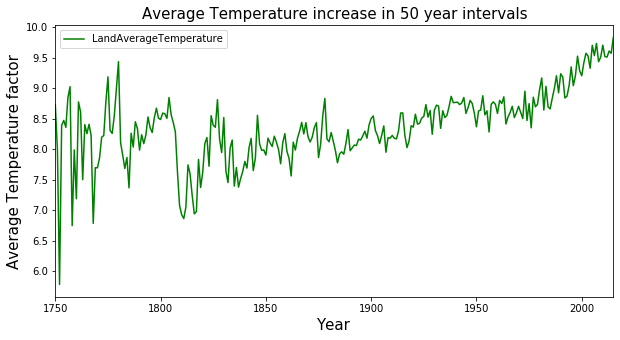

In [10]:
year_temp.plot(figsize=(10,5),color='green')



plt.title('Average Temperature increase in 50 year intervals',size=15)
plt.xlabel('Year',size=15)
plt.ylabel('Average Temperature factor',size=15)


In [11]:
mean=year_temp.LandAverageTemperature.mean()
year_temp['Deviation']=year_temp.LandAverageTemperature-mean
year_temp=year_temp.reset_index()
year_temp

,dt,LandAverageTemperature,Deviation
0,1750,8.719364,0.350027
1,1751,7.976143,-0.393194
2,1752,5.779833,-2.589504
3,1753,8.388083,0.018746
4,1754,8.469333,0.099996
5,1755,8.355583,-0.013754
6,1756,8.849583,0.480246
7,1757,9.022000,0.652663
8,1758,6.743583,-1.625754
9,1759,7.985083,-0.384254


In [12]:
x=[]
for year in year_temp.dt:
    x.append(year)

In [13]:
y=[]
for temp in year_temp.LandAverageTemperature:
    y.append(temp)

In [14]:
z=np.poly1d(np.polyfit(x,y,6))

In [15]:
t=np.linspace(1750,2015,1000)

In np.linspace, we are dividing 1750 to 2000 in 1000 points

Text(0.5, 1.0, 'Increase of average temperatures of the world')

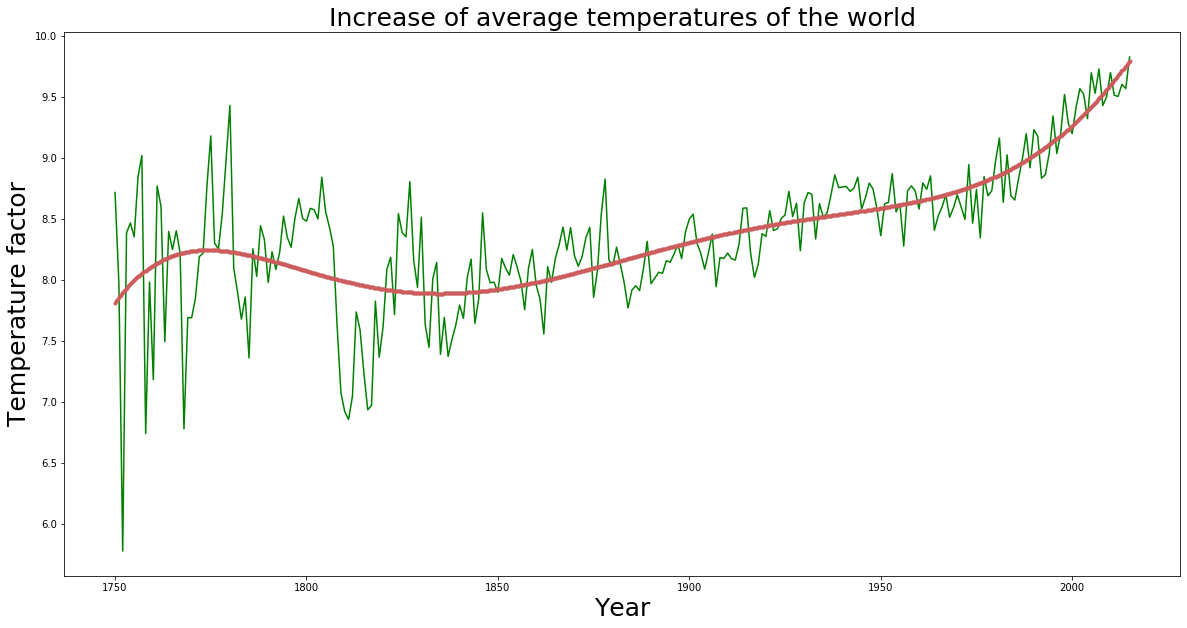

In [16]:
plt.figure(figsize=(20,10))
plt.plot(x,y,'-',color='green')
plt.plot(t,z(t),'.',color='indianred')
plt.xlabel('Year',size=25)
plt.ylabel('Temperature factor',size=25)
plt.title('Increase of average temperatures of the world',size=25)



In [17]:
bycities=pd.read_csv('climate_change/GlobalLandTemperaturesByCity.csv',parse_dates=['dt'])

In [18]:
bycities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [19]:
bycities[['City','Country']].drop_duplicates()
bycities.City = bycities.City.str.cat(bycities.Country, sep=' ')
bycities=bycities[bycities.dt.dt.year>=1900]
bycities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1874,1900-01-01,-0.989,0.588,Århus Denmark,Denmark,57.05N,10.33E
1875,1900-02-01,-2.799,0.882,Århus Denmark,Denmark,57.05N,10.33E
1876,1900-03-01,0.592,0.429,Århus Denmark,Denmark,57.05N,10.33E
1877,1900-04-01,4.630,0.417,Århus Denmark,Denmark,57.05N,10.33E
1878,1900-05-01,9.576,0.521,Århus Denmark,Denmark,57.05N,10.33E


In [20]:
city_means=bycities.groupby(['City',bycities.dt.dt.year])['AverageTemperature'].mean().unstack()
city_mins=bycities.groupby(['City',bycities.dt.dt.year])['AverageTemperature'].min().unstack()
city_maxs=bycities.groupby(['City',bycities.dt.dt.year])['AverageTemperature'].max().unstack()


In [21]:
city_means.head()

dt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
City,,,,,,,,,,,,,,,,,,,,,
A Coruña Spain,13.267917,12.773417,12.828333,13.028167,13.349083,12.688000,13.107333,12.900583,13.235250,12.694667,...,13.928500,13.977667,14.540917,13.806167,13.682333,14.076167,13.946500,14.585500,13.625667,13.983750
Aachen Germany,9.132500,8.339750,8.133583,8.994000,8.987333,8.571083,8.877917,8.479833,8.108750,7.979000,...,9.657917,10.046333,10.471667,10.551833,9.863083,9.993750,8.703750,10.654667,9.788500,9.531500
Aalborg Denmark,7.375250,7.875667,6.542667,7.830833,7.577083,7.808917,8.229000,7.273000,7.796667,6.878167,...,8.919000,8.952333,9.514750,9.528583,9.628000,8.938667,6.965000,9.181167,8.399833,8.497625
Aba Nigeria,26.418833,26.455333,26.001750,25.875917,25.342083,26.315250,26.145000,26.029000,26.117500,26.082250,...,27.427333,27.422167,27.551083,27.551583,27.351583,27.631167,27.696667,27.388083,27.253500,27.513625
Abadan Iran,25.016167,25.770750,25.459083,24.242750,24.777750,24.393500,24.314667,23.778750,24.683250,25.284333,...,26.108583,25.901083,26.278583,26.281833,26.216917,26.392083,27.592833,26.019833,26.607833,27.095625


In [22]:
first_years_mean=city_means.iloc[:,:5].mean(axis=1)
city_means_shifted=city_means.subtract(first_years_mean,axis=0)

In [23]:
city_means_shifted

dt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
City,,,,,,,,,,,,,,,,,,,,,
A Coruña Spain,0.218533,-0.275967,-0.221050,-0.021217,0.299700,-0.361383,0.057950,-0.148800,0.185867,-0.354717,...,0.879117,0.928283,1.491533,0.756783,0.632950,1.026783,0.897117,1.536117,0.576283,0.934367
Aachen Germany,0.415067,-0.377683,-0.583850,0.276567,0.269900,-0.146350,0.160483,-0.237600,-0.608683,-0.738433,...,0.940483,1.328900,1.754233,1.834400,1.145650,1.276317,-0.013683,1.937233,1.071067,0.814067
Aalborg Denmark,-0.065050,0.435367,-0.897633,0.390533,0.136783,0.368617,0.788700,-0.167300,0.356367,-0.562133,...,1.478700,1.512033,2.074450,2.088283,2.187700,1.498367,-0.475300,1.740867,0.959533,1.057325
Aba Nigeria,0.400050,0.436550,-0.017033,-0.142867,-0.676700,0.296467,0.126217,0.010217,0.098717,0.063467,...,1.408550,1.403383,1.532300,1.532800,1.332800,1.612383,1.677883,1.369300,1.234717,1.494842
Abadan Iran,-0.037133,0.717450,0.405783,-0.810550,-0.275550,-0.659800,-0.738633,-1.274550,-0.370050,0.231033,...,1.055283,0.847783,1.225283,1.228533,1.163617,1.338783,2.539533,0.966533,1.554533,2.042325
Abakaliki Nigeria,0.400050,0.436550,-0.017033,-0.142867,-0.676700,0.296467,0.126217,0.010217,0.098717,0.063467,...,1.408550,1.403383,1.532300,1.532800,1.332800,1.612383,1.677883,1.369300,1.234717,1.494842
Abakan Russia,-0.259767,0.146150,0.184567,-0.698517,0.627567,-0.533850,-0.635267,-0.907850,-0.057017,-0.776600,...,1.723733,0.487817,0.589900,3.030233,2.010233,0.419983,-0.556183,0.748733,-0.273683,2.712275
Abbotsford Canada,0.426883,-0.062450,-0.128200,-0.430033,0.193800,0.214467,0.647800,-0.323700,0.009883,-0.934117,...,1.770717,1.200300,1.132717,0.539383,0.126967,0.623883,1.153383,0.035717,0.673467,2.674828
Abengourou Côte D'Ivoire,0.413767,0.237600,0.001600,-0.205317,-0.447650,0.085850,0.383600,-0.048233,0.086350,-0.149983,...,1.291017,1.383433,1.291433,1.441433,1.307267,1.403183,1.660267,1.316683,1.075933,1.589975


In [24]:
random_cities=city_means_shifted.sample(5).index
random_cities

Index(['Bacau Romania', 'Hanoi Vietnam', 'Pilibhit India',
       'Port Harcourt Nigeria', 'Granada Spain'],
      dtype='object', name='City')

In [25]:
random_cities

Index(['Bacau Romania', 'Hanoi Vietnam', 'Pilibhit India',
       'Port Harcourt Nigeria', 'Granada Spain'],
      dtype='object', name='City')

In [26]:
for city in random_cities:
    x=city_means_shifted.loc[city]

def plot_temps(cities, city_ser, ax):
    first_years_mean = city_ser.iloc[:, :5].mean(axis=1)
    city_ser = city_ser.subtract(first_years_mean, axis=0)
    for city in random_cities:
        row = city_ser.loc[city]
        #pd.stats.moment.ewma(row, 10).plot(label=row.name, ax=ax)
        
    ax.set_xlabel('')
    ax.legend(loc='best')

fig, axes = plt.subplots(3,1, figsize=(10,10))

n = 5
random_cities = city_means_shifted.sample(n).index

plot_temps(random_cities, city_means, axes[0])
plot_temps(random_cities, city_mins, axes[1])
plot_temps(random_cities, city_maxs, axes[2])

axes[0].set_title("Year's mean temperature increase for random cities")
axes[1].set_title("Year's min temperature increase for random cities")
axes[2].set_title("Year's max temperature increase for random cities")

Text(0.5, 0, 'Year')

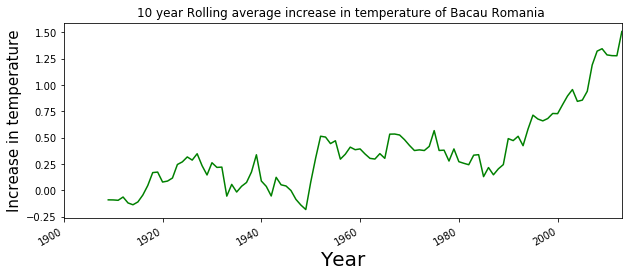

In [27]:
z=city_means_shifted.loc[random_cities[0]].rolling(10).mean()
z.plot(figsize=(10,4),color='green',subplots=True)
plt.title('10 year Rolling average increase in temperature of {} '.format(random_cities[0]))
plt.ylabel('Increase in temperature',size=15)
plt.xlabel('Year',size=20)

In [28]:
random_cities

Index(['Bacau Romania', 'Hanoi Vietnam', 'Pilibhit India',
       'Port Harcourt Nigeria', 'Granada Spain'],
      dtype='object', name='City')

Text(0.5, 0, 'Year')

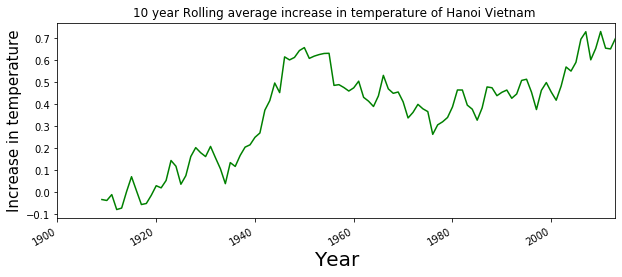

In [29]:
z=city_means_shifted.loc[random_cities[1]].rolling(10).mean()
z.plot(figsize=(10,4),color='green',subplots=True)
plt.title('10 year Rolling average increase in temperature of {} '.format(random_cities[1]))
plt.ylabel('Increase in temperature',size=15)
plt.xlabel('Year',size=20)

In [206]:
df_india=bycities.loc[bycities['Country'].isin(['India'])]

In [207]:
df_india.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
50886,1900-01-01,11.625,0.619,Abohar India,India,29.74N,73.85E
50887,1900-02-01,15.541,0.651,Abohar India,India,29.74N,73.85E
50888,1900-03-01,23.923,0.582,Abohar India,India,29.74N,73.85E
50889,1900-04-01,26.582,0.470,Abohar India,India,29.74N,73.85E
50890,1900-05-01,32.332,0.586,Abohar India,India,29.74N,73.85E


In [208]:
df_india=df_india.reset_index(drop=True)
df_india
    



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1900-01-01,11.625,0.619,Abohar India,India,29.74N,73.85E
1,1900-02-01,15.541,0.651,Abohar India,India,29.74N,73.85E
2,1900-03-01,23.923,0.582,Abohar India,India,29.74N,73.85E
3,1900-04-01,26.582,0.470,Abohar India,India,29.74N,73.85E
4,1900-05-01,32.332,0.586,Abohar India,India,29.74N,73.85E
5,1900-06-01,36.006,0.645,Abohar India,India,29.74N,73.85E
6,1900-07-01,34.237,0.859,Abohar India,India,29.74N,73.85E
7,1900-08-01,31.843,0.935,Abohar India,India,29.74N,73.85E
8,1900-09-01,29.147,0.822,Abohar India,India,29.74N,73.85E
9,1900-10-01,24.324,0.620,Abohar India,India,29.74N,73.85E


In [209]:
df_india['Latitude_N']=df_india.Latitude.str[:4]

In [210]:
df_india['Longitude_E']=df_india.Longitude.str[:4]

In [211]:
df_india.Latitude_N[16380]

'8.84'

In [212]:
df_india.Latitude_N=pd.to_numeric(df_india.Latitude_N)

In [213]:
df_india.Longitude_E=pd.to_numeric(df_india.Longitude_E)

The above is done to change the longitudes and latitudes in numerics instead of strings

In [214]:
df_india=df_india.drop('Latitude',axis=1)
df_india=df_india.drop('Longitude',axis=1)

In [215]:
df_india

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude_N,Longitude_E
0,1900-01-01,11.625,0.619,Abohar India,India,29.7,73.8
1,1900-02-01,15.541,0.651,Abohar India,India,29.7,73.8
2,1900-03-01,23.923,0.582,Abohar India,India,29.7,73.8
3,1900-04-01,26.582,0.470,Abohar India,India,29.7,73.8
4,1900-05-01,32.332,0.586,Abohar India,India,29.7,73.8
5,1900-06-01,36.006,0.645,Abohar India,India,29.7,73.8
6,1900-07-01,34.237,0.859,Abohar India,India,29.7,73.8
7,1900-08-01,31.843,0.935,Abohar India,India,29.7,73.8
8,1900-09-01,29.147,0.822,Abohar India,India,29.7,73.8
9,1900-10-01,24.324,0.620,Abohar India,India,29.7,73.8


In [217]:
df_india_hot=df_india[df_india.AverageTemperature>32]
df_india_hot
df_india_cold=df_india[df_india.AverageTemperature<10]


In [220]:
lat_h=df_india_hot['Latitude_N'].values
lon_h=df_india_hot['Longitude_E'].values
brg_h=df_india_hot['AverageTemperature'].values
lat_c=df_india_cold['Latitude_N'].values
lon_c=df_india_cold['Longitude_E'].values
brg_c=df_india_cold['AverageTemperature'].values

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/rinbaruah/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Text(0.5, 1.0, 'Extreme temperature zones in India')

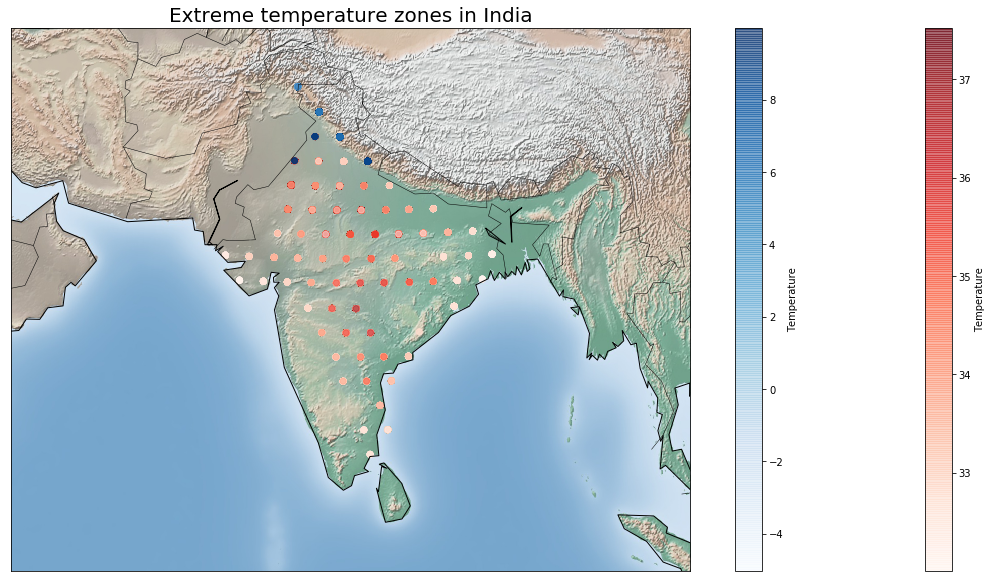

In [221]:
fig=plt.figure(figsize=(20,10))
m=Basemap(projection='lcc',resolution='c',lat_0=20.6,lon_0=78,width=5E6,height=4E6)
m.shadedrelief()
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawstates(color='red')

m.scatter(lon_h,lat_h,c=brg_h,latlon=True,cmap='Reds',alpha=0.6)
plt.colorbar(label='Temperature')
m.scatter(lon_c,lat_c,c=brg_c,latlon=True,cmap='Blues',alpha=0.6)
plt.colorbar(label='Temperature')

plt.title('Extreme temperature zones in India',size=20)
